In [26]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('/Users/marjaana/VSCode/snlp_toxicity/data/dev_2024.csv')

In [43]:
df.head()

,id,text,label
0,0,He was older and was carrying a small bucket.,0
1,1,"As in all professions people cannot all be ""l...",0
2,2,"IREPthe 541: "" On another note Kitty Piercy ha...",0
3,3,hey lefty loser how about they take commercial...,1
4,4,I expect a large reduction in these grants to ...,0


In [44]:
def pre_processing(text):
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Remove mentions (@)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # Remove newline character
    text = re.sub(r'\n','', text)

    # Everything except letters, numbers, and hashtags are replaced with a space.
    text = re.sub(r"[^A-Za-z0-9#]+", ' ', text)

    # Remove any extra spaces between words, and trailing or leading spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['cleantext'] = df['text'].apply(pre_processing)

In [45]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [46]:
import nltk
from nltk.corpus import stopwords

import ssl
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marjaana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stopwords = stopwords.words("english")

In [48]:
def remove_stopwords(text):
    tokens_list = text.split()

    lc_tokens_list = []
    for i in tokens_list:
        lc_tokens_list.append(i.lower())

    filtered_text = [token for token in lc_tokens_list if token not in stopwords]

    return ' '.join(filtered_text)

In [49]:
df['stopwords'] =  df['cleantext'].apply(remove_stopwords)

In [50]:
df['stopwords'].head()

0                          older carrying small bucket
1    professions people cannot lumped umbrella many...
2    irepthe 541 another note kitty piercy done not...
3    hey lefty loser take commercial together save bit
4    expect large reduction grants states especiall...
Name: stopwords, dtype: object

In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


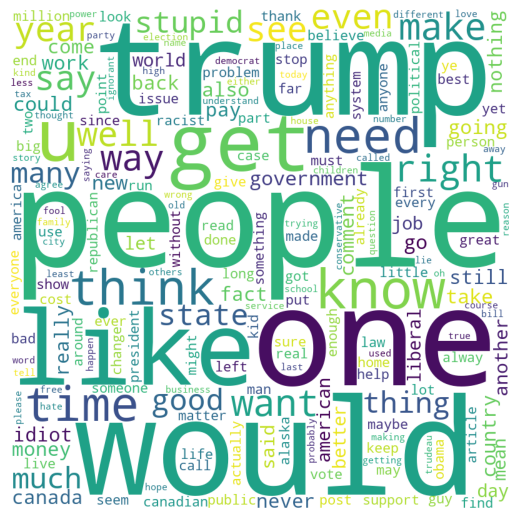

<Figure size 640x480 with 0 Axes>

In [52]:
from wordcloud import WordCloud

comment_words = ''

for sentence in df.stopwords:


    sentence = str(sentence)


    words = sentence.split()

    for i in range(len(words)):
        words[i] = words[i].lower()

    comment_words += " ".join(words)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)


plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
plt.savefig("devcloud.png")